# Lab Assignment 1



### Sam Dauncey, s2028017

## Task 1

Use `SymPy` to solve the differential equation $y' = -y^2\sin(x)$, with $y(0)=1$, and plot the solution.

Equation:


Has solution (for y(0) = 1):


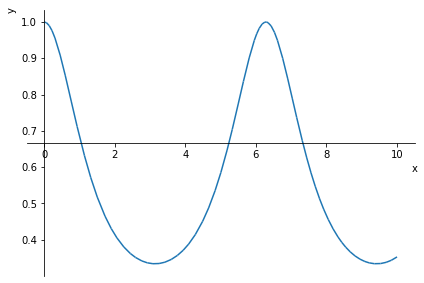

In [4]:
from sympy import *
init_printing()
from IPython.display import display_latex

# Define symbols for sympy to work with.
x = symbols("x")
y = Function("y")
y_prime = y(x).diff(x)

# Define the differential equation and print it into the console.
diff_eq = Eq(y_prime,
             -(y(x)**2)*sin(x))

print("Equation:")
display_latex(diff_eq)

# Solve it and print the solution into the console.
sol = dsolve(diff_eq, ics={y(0):1})

print("Has solution (for y(0) = 1):")
display_latex(sol)

# Plot the solution
plotting.plot(sol.rhs, (x,0,10), xlabel = 'x', ylabel = 'y')

## Task 2

Use `SciPy`'s `odeint` function to solve the system of equations

$$ \begin{align*}\frac{dx}{dt} &= y \\ \frac{dy}{dt}&=x-x^3\end{align*} $$

Produce a plot of the solutions for $0\leq t\leq 10$ with initial conditions $x(0)=0$ and $y(0)\in\{0, 0.5, 1, \ldots, 3\}$.

How many curves do you expect to see plotted? How many do you actually see, and why is this?

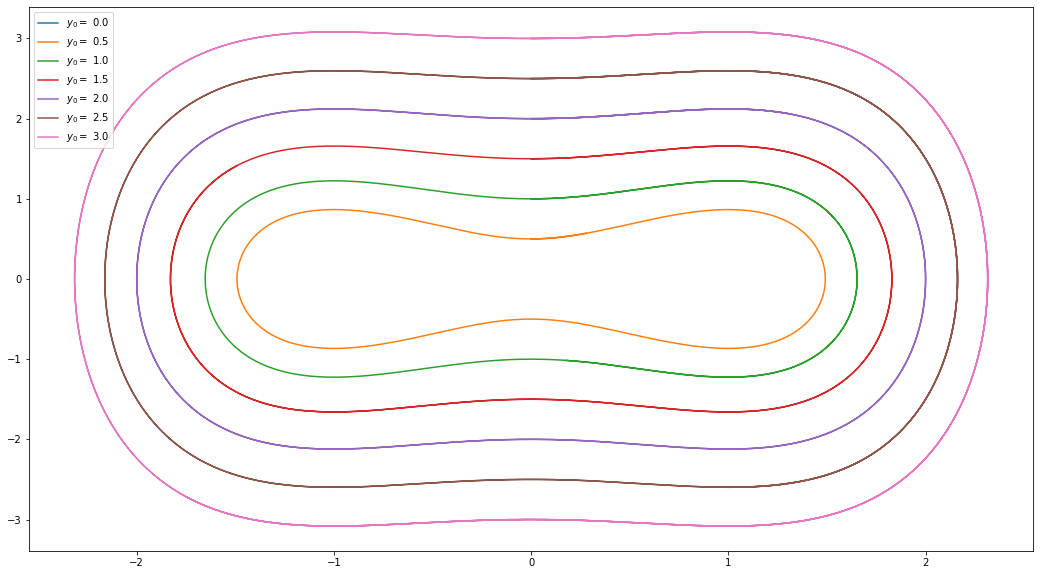

In [3]:
# Imports for numerical integration and plotting
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# Setup a figure and axes
fig, ax = plt.subplots(figsize=(18, 10))


#
def dX_dt(X, t):
    x, y = X
    return (y, x - x**3)


t_range = np.linspace(0, 10, 1000)

for i in range(7):
    y_0 = i/2
    X = odeint(dX_dt, (0, y_0), t_range)
    x_list, y_list = X.T
    ax.plot(x_list, y_list, label=f"$y_0 =$ {y_0}")
    
ax.legend()


We don't see the solution plotted for $(x_0, y_0) = (0, 0)$. This is because at this point both $\frac{dx}{dt}$ and $\frac{dy}{dt}$ are $0$; so the $x$ and $y$ values of our solution won't change as time progresses.

Note that our differential equation gives the level curves to:

$$ F(x, y) = \frac{1}{4}(2 y^2 + x^4 - 2x^2) $$

Hence why our plot looks like a contour plot (because it is).